In [1]:
import numpy as np
import os
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf


from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model



In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re


In [3]:
vgg_df = pd.read_csv('vgg_2.csv')
pattern = r"[^']+\@[^']+"

# def find_pattern(id_str):
#     return id_str

# vgg_df['id'] = vgg_df['id'].apply(find_pattern)

full_count_df = pd.read_csv('full_count.csv')

# Assuming both DataFrames have an 'id' column to match the entries
# Merge on 'id' to filter out labels without corresponding features
merged_df = vgg_df.merge(full_count_df[['id', 'average']], on='id', how='left')
merged_df =merged_df.dropna()
merged_df


KeyboardInterrupt: 

In [ ]:
X = merged_df.drop(columns=['Unnamed: 0','id', "average", ]).values  # Adjust 'label' to the actual column name in full_count_df for labels
y = merged_df['average'].values.squeeze()  # Adjust 'label' to the actual column name in full_count_df for labels


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='best_model_2.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[checkpoint_callback])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict using the model
predictions = model.predict(X_test)

Epoch 1/100
387/431 [=========================>....] - ETA: 0s - loss: 2053904384.0000
Epoch 1: val_loss improved from inf to 1406130688.00000, saving model to best_model_2.h5
431/431 [==============================] - 1s 2ms/step - loss: 2004738048.0000 - val_loss: 1406130688.0000
Epoch 2/100
141/431 [========>.....................] - ETA: 0s - loss: 1430962816.0000

c:\Users\hec_m\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


431/431 [==============================] - ETA: 0s - loss: 1392416640.0000
Epoch 2: val_loss improved from 1406130688.00000 to 1366822272.00000, saving model to best_model_2.h5
431/431 [==============================] - 1s 1ms/step - loss: 1392416640.0000 - val_loss: 1366822272.0000
Epoch 3/100
385/431 [=========================>....] - ETA: 0s - loss: 1355037952.0000
Epoch 3: val_loss improved from 1366822272.00000 to 1349232768.00000, saving model to best_model_2.h5
431/431 [==============================] - 1s 1ms/step - loss: 1355810176.0000 - val_loss: 1349232768.0000
Epoch 4/100
389/431 [==========================>...] - ETA: 0s - loss: 1333454848.0000
Epoch 4: val_loss improved from 1349232768.00000 to 1339477120.00000, saving model to best_model_2.h5
431/431 [==============================] - 1s 1ms/step - loss: 1329826176.0000 - val_loss: 1339477120.0000
Epoch 5/100
385/431 [=========================>....] - ETA: 0s - loss: 1313649280.0000
Epoch 5: val_loss improved from 13394

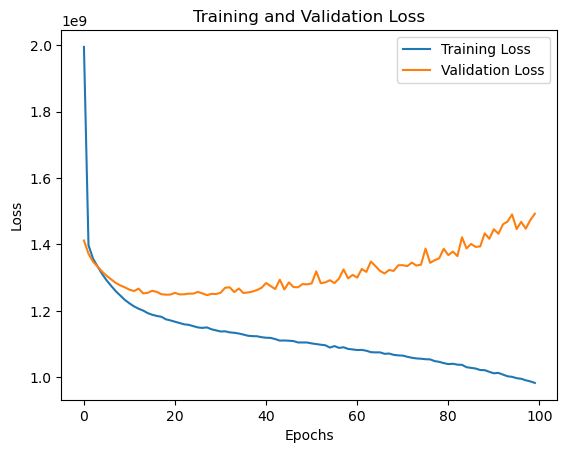

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model_2.h5')

In [ ]:

loss = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

135/135 [==============================] - 0s 1ms/step - loss: 1245338752.0000
Test Loss: 1245338752.0


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error


loss = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

def rmsle_eval(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))

rmsle_score = rmsle_eval(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSLE: {rmsle_score}')

135/135 [==============================] - 0s 1ms/step - loss: 1245338752.0000
Test Loss: 1245338752.0
135/135 [==============================] - 0s 825us/step
MSE: 1245338737.2561147
MAE: 23300.155376002753
RMSLE: 1.7804563648827774


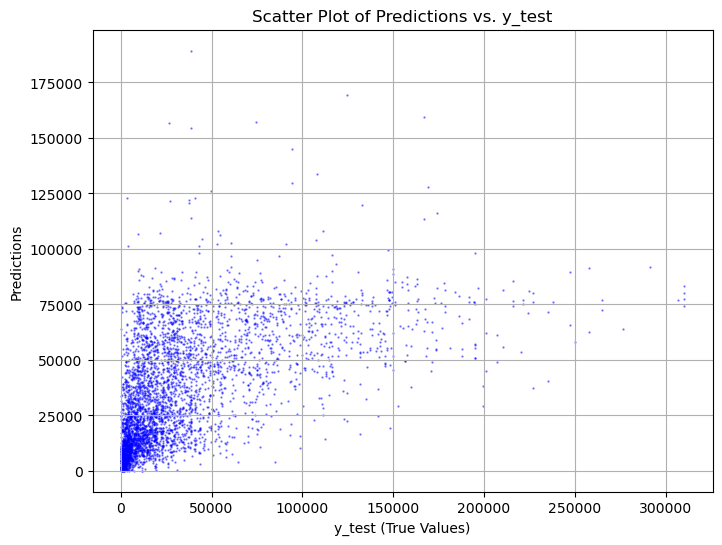

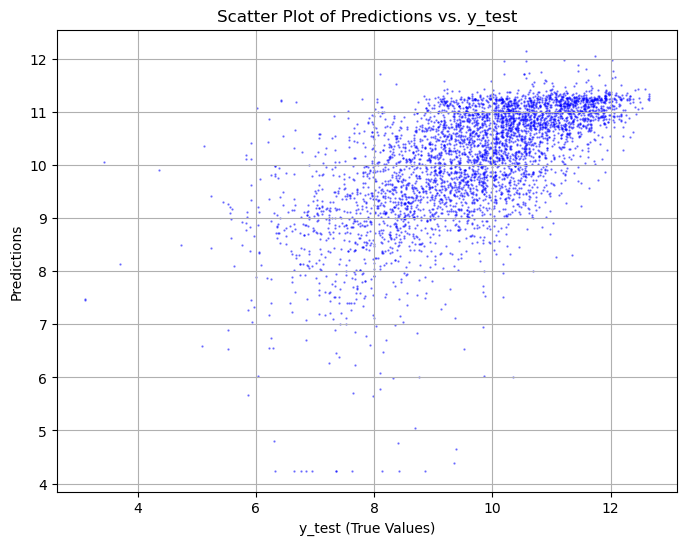

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, s=0.4)
plt.title('Scatter Plot of Predictions vs. y_test')
plt.xlabel('y_test (True Values)')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.log(y_test), np.log(predictions), color='blue', alpha=0.5, s=0.4)
plt.title('Scatter Plot of Predictions vs. y_test')
plt.xlabel('y_test (True Values)')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()


